<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

# Macroeconomia e Finanças

**ATENÇÃO: Itens referente à API do BACEN estão desativados dentro da NASDAQ DATALINK, provemos uma solução alternativa no código buscando diretamente do site do BACEN.**

In [183]:
import requests
import pandas as pd

def extracao_bcb(codigo, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  response = requests.get(url)
  dados = response.json()
  df = pd.DataFrame(dados)
  df.set_index('data', inplace= True)
  df.index = pd.to_datetime(df.index, dayfirst=True)
  df.rename(columns={'valor':'Value'},inplace=True)
  df['Value'] = df['Value'].astype(float)
  return df

## Chave de API

***Atenção:***

***A API da nasdaq-data-link parece que está com alguns problemas. Para dar continuidade no código, usaremos a API fredapi***

- Crie sua conta para obter a chave de acesso: https://fred.stlouisfed.org/ (Na parte Superior 'My Account')
- Depois de criar a conta ir em 'My Account' e clicar em 'API keys'
- Pode escrever uma breve observação sobre o uso da API. Por exemplo: I want to use the API to get US interest data for educational purposes.

In [145]:
chave = '5Dvc13kQ_qEj-QnxsJdA'
fred_api_key = 'c2031ca497b3bc60b421e2f3c6118a99'

## Instalar e Importar Bibliotecas

In [146]:
!pip install nasdaq-data-link
!pip install yfinance
!pip install wbdata
!pip install fredapi

In [167]:
#Importando bibliotecas

import nasdaqdatalink
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import quandl
from fredapi import Fred

In [148]:

nasdaqdatalink.ApiConfig.api_key = chave

fred = Fred(api_key=fred_api_key)

## Indicadores Macroeconômicos

### Base

In [149]:
# Com a API nasdaqdatalink
# juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR')

# Com a API fred
juros_reais_EUA = fred.get_series('EFFR')
juros_reais_EUA = pd.DataFrame(juros_reais_EUA, columns=['Value'])
juros_reais_EUA.index.name = 'Date'
juros_reais_EUA


,Value
Date,
2000-07-03,7.03
2000-07-04,NaN
2000-07-05,6.52
2000-07-06,6.51
2000-07-07,6.42
...,...
2025-01-20,NaN
2025-01-21,4.33
2025-01-22,4.33


In [150]:
#Limitar a data
# Com a API nasdaqdatalink
# juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR', start_date='2022-01-01', end_date='2022-08-20')

# Filtrando a dataframe 
juros_reais_EUA = juros_reais_EUA.loc['2022-01-01':'2022-08-20']

juros_reais_EUA

,Value
Date,
2022-01-03,0.08
2022-01-04,0.08
2022-01-05,0.08
2022-01-06,0.08
2022-01-07,0.08
...,...
2022-08-15,2.33
2022-08-16,2.33
2022-08-17,2.33


In [151]:
# juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR', collapse='monthly')
# juros_reais_EUA


# Obtendo os dados do EFFR com frequência mensal
effr = fred.get_series('EFFR', frequency='m')

# Transformando em DataFrame
effr_df = pd.DataFrame(effr, columns=['EFFR'])
effr_df.rename(columns={'EFFR': 'Value'}, inplace=True)
effr_df.index.name = 'Date'

# Exibindo os dados
effr_df

,Value
Date,
2000-07-01,6.52
2000-08-01,6.50
2000-09-01,6.51
2000-10-01,6.52
2000-11-01,6.52
...,...
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.65


## Taxa Selic

In [152]:
#selic = nasdaqdatalink.get('BCB/432', start_date='2000-01-01', end_date='2022-12-31')
selic = extracao_bcb(432,'01/01/2000', '31/12/2022')
selic

,Value
data,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2022-12-27,13.75
2022-12-28,13.75
2022-12-29,13.75


In [153]:
#Criar um gráfico da Selic

fig = go.Figure()
fig.add_trace(go.Scatter(name='SELIC', x=selic.index,y=selic.Value))
fig.show()

## Índices inflacionários

In [154]:
#IPCA Acumulado

#ipca = nasdaqdatalink.get('BCB/13522',start_date='2000-01-01')
ipca = extracao_bcb(13522, '01/01/2000', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))
ipca

,Value
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2024-08-01,4.24
2024-09-01,4.42
2024-10-01,4.76


In [155]:
#Criar o gráfico do IPCA

fig = go.Figure()
fig.add_trace(go.Scatter(name='IPCA', x=ipca.index, y=ipca.Value ))
fig.update_layout(title_text='<b>IPCA Acumulado 12M', template='simple_white')
fig.show()

In [156]:
#Preços administrados
#BCB/4448 - Bens não comercalizaveis
#BCB/4447 - Bens comercalizaveis

#ipca_adm = nasdaqdatalink.get('BCB/4449', start_date = '2000-01-01')
ipca_adm = extracao_bcb(4449, '01/01/2000', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))

fig = go.Figure()
fig.add_trace(go.Bar(name='IPCA_ADM', x=ipca_adm.index, y=ipca_adm.Value))
fig.show()

In [157]:
#IGPM

#igpm = nasdaqdatalink.get('BCB/189', start_date='2000-01-01')


igpm = extracao_bcb(189, '01/01/2000', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))
igpm

,Value
data,
2000-01-01,1.24
2000-02-01,0.35
2000-03-01,0.15
2000-04-01,0.23
2000-05-01,0.31
...,...
2024-08-01,0.29
2024-09-01,0.62
2024-10-01,1.52


In [158]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='IGPM', x=igpm.index, y=igpm.Value))
fig.show()

In [159]:
#INCC

#incc = nasdaqdatalink.get('BCB/192', start_date='2002-01-01')

incc = extracao_bcb(192, '01/01/2002', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))

fig=go.Figure()
fig.add_trace(go.Bar(name='INCC', x=incc.index, y=incc.Value))
fig.update_layout(title_text='INCC Variação Mensal', template='simple_white')
fig.show()

## PIB

In [160]:
#PIB em dólar ODA/BRA_NGDPD

#pib = nasdaqdatalink.get('BCB/4380', start_date='2000-01-01')

pib = extracao_bcb(4380, '01/01/2000', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))
fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB', x=pib.index, y=pib.Value))
fig.show()


In [161]:
#PIB em dólar

#pib_usd = nasdaqdatalink.get('ODA/BRA_NGDPD', start_date='2000-01-01')

***Atenção:***

***Como o nasdaq data link não está funcionando, uma alternativa é usar o wbdata***

In [162]:
import wbdata
import datetime
import pandas as pd

# Definir datas de início e fim
data_inicio = datetime.datetime(2000, 1, 1)
data_fim = datetime.datetime(2023, 1, 1)

# Baixar dados do PIB em USD (NY.GDP.MKTP.CD) para o Brasil
pib_brasil = wbdata.get_dataframe(indicators={'NY.GDP.MKTP.CD': 'PIB_USD'}, country='BR', date=(data_inicio, data_fim))

# Organizar e plotar os dados
pib_brasil = pib_brasil.reset_index()

import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB_USD', x=pib_brasil['date'], y=pib_brasil['PIB_USD']))
fig.show()

## Índices de Confiança

### Sondagem de Serviços

In [168]:
#confianca_servicos = nasdaqdatalink.get('BCB/20339', start_date='2002-01-01')

confianca_servicos = extracao_bcb(20339, '01/01/2002', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))

fig = go.Figure()
fig.add_trace(go.Scatter(name='ConfiancaServicos', x=confianca_servicos.index, y=confianca_servicos.Value))
fig.show()

### Confiança do Consumidor

In [169]:
#confianca_consumidor = nasdaqdatalink.get('BCB/4393')

confianca_consumidor = extracao_bcb(4393, '01/01/2000', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))


fig = go.Figure()
fig.add_trace(go.Scatter(name='Confianca_Consumidor', x=confianca_consumidor.index, y=confianca_consumidor.Value))
fig.show()

## Dólar

In [170]:
#Yahoo Finance BRL=X
#Nasdaq Datalink Banco Central BCB/10813

#dolar = nasdaqdatalink.get('BCB/10813', start_date='2000-01-01')

dolar = extracao_bcb(10813, '01/01/2000', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))

fig = go.Figure()
fig.add_trace(go.Scatter(name='DÓLAR', x=dolar.index, y=dolar.Value))
fig.update_layout(title_text='Dólar/Real', template='simple_white')
fig.show()


## Correlações

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns

### Indicadores Macroeconômicos

In [189]:
#Criar dataframes vazios

selic2 = pd.DataFrame()
confianca_consumidor2 = pd.DataFrame()
pib2 = pd.DataFrame()
incc2 = pd.DataFrame()
ipca2 = pd.DataFrame()
dolar2 = pd.DataFrame()

In [179]:
#Obter os dados

#selic2['SELIC'] = nasdaqdatalink.get('BCB/432', start_date='2015-01-01', end_date='2022-12-31', collapse='monthly')
#pib2['PIB'] = nasdaqdatalink.get("BCB/4380", start_date="2015-01-01",end_date="2022-12-31",collapse="monthly")
#confianca_consumidor2['CONFIANCA'] = nasdaqdatalink.get('BCB/4393', start_date='2015-01-01', end_date="2022-12-31",collapse="monthly")
#ipca2['IPCA'] = nasdaqdatalink.get("BCB/13522", start_date = '2015-01-01',end_date="2022-12-31",collapse="monthly")
#incc2['INCC'] = nasdaqdatalink.get('BCB/192', start_date='2015-01-01',end_date="2022-12-31",collapse="monthly")
#dolar2['DOLAR'] = nasdaqdatalink.get('BCB/10813', start_date='2015-01-01', end_date='2022-12-31', collapse='monthly')

In [180]:
selic2['SELIC'] = extracao_bcb(432, '01/01/2015', data_fim='31/12/2022')
selic2

,SELIC
data,
2015-01-01,11.75
2015-01-02,11.75
2015-01-03,11.75
2015-01-04,11.75
2015-01-05,11.75
...,...
2022-12-27,13.75
2022-12-28,13.75
2022-12-29,13.75


In [181]:
selic2 = selic2['SELIC'].resample('ME').last()
selic2

data
2015-01-31    12.25
2015-02-28    12.25
2015-03-31    12.75
2015-04-30    13.25
2015-05-31    13.25
              ...  
2022-08-31    13.75
2022-09-30    13.75
2022-10-31    13.75
2022-11-30    13.75
2022-12-31    13.75
Freq: ME, Name: SELIC, Length: 96, dtype: float64

In [186]:
df = extracao_bcb(4393, inicio, data_fim=fim)

In [188]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [190]:
inicio = '01/01/2015'
fim = '31/12/2022'
selic2['SELIC'] = extracao_bcb(432, inicio, data_fim=fim)
selic2 = selic2.resample('ME').last()
confianca_consumidor2['CONFIANCA'] = extracao_bcb(4393, inicio, data_fim=fim)
confianca_consumidor2 = confianca_consumidor2.resample('ME').last()
pib2['PIB'] = extracao_bcb(4380, inicio, data_fim=fim)
pib2 = pib2.resample('ME').last()
ipca2['IPCA'] = extracao_bcb(13522, inicio, data_fim=fim)
ipca2 = ipca2.resample('ME').last()
incc2['INCC'] =extracao_bcb(192, inicio, data_fim=fim)
incc2 = incc2.resample('ME').last()
dolar2['DOLAR'] = extracao_bcb(10813, inicio, data_fim=fim)
dolar2 = dolar2.resample('ME').last()

In [191]:
macros = pd.concat([selic2, confianca_consumidor2, pib2, ipca2, incc2, dolar2], axis=1)
macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2015-01-31,12.25,112.69,474381.1,7.14,0.92,2.6617
2015-02-28,12.25,112.89,466933.5,7.70,0.31,2.8777
2015-03-31,12.75,106.86,515344.0,8.13,0.62,3.2074
2015-04-30,13.25,101.56,497198.0,8.17,0.46,2.9930
2015-05-31,13.25,91.77,492304.5,8.47,0.95,3.1781
...,...,...,...,...,...,...
2022-08-31,13.75,106.76,873656.6,8.73,0.09,5.1784
2022-09-30,13.75,111.46,857936.1,7.17,0.09,5.4060
2022-10-31,13.75,114.23,880717.2,6.47,0.12,5.2564


In [192]:
#Criar uma matriz de correlação

corr_macros = macros.corr()
corr_macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
SELIC,1.000000,-0.497816,-0.202687,0.619247,-0.142728,-0.469835
CONFIANCA,-0.497816,1.000000,0.332755,-0.452705,-0.157292,0.194353
PIB,-0.202687,0.332755,1.000000,0.232989,0.267005,0.791491
IPCA,0.619247,-0.452705,0.232989,1.000000,0.289942,0.141250
INCC,-0.142728,-0.157292,0.267005,0.289942,1.000000,0.315761
DOLAR,-0.469835,0.194353,0.791491,0.141250,0.315761,1.000000


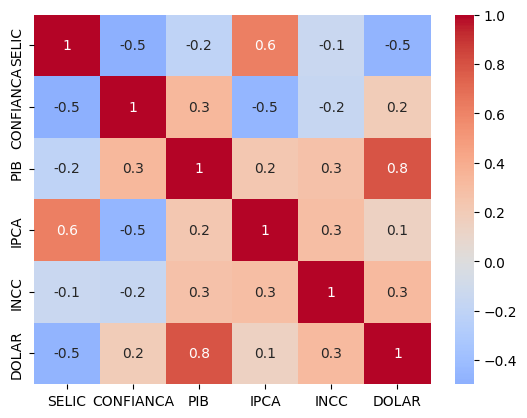

In [193]:
#Construir um heatmap

lista_macros = macros.columns

sns.heatmap(corr_macros, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

In [194]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='SELIC', x=macros.index, y=macros['SELIC']),row=1, col=1)
fig.add_trace(go.Scatter(name='IPCA', x=macros.index, y=macros['IPCA']),row=1, col=1, secondary_y=False)
fig.update_layout(title_text='SELIC VS IPCA', template='simple_white')
fig.show()

In [195]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='PIB', x=macros.index, y=macros['PIB']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=macros.index, y=macros['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='PIB VS DOLAR', template='simple_white')
fig.show()

## Combinando ativos com macro


In [196]:

selic3 = pd.DataFrame()
confianca_consumidor3 = pd.DataFrame()
pib3 = pd.DataFrame()
incc3 = pd.DataFrame()
ipca3 = pd.DataFrame()
dolar3 = pd.DataFrame()

#selic3['SELIC'] = nasdaqdatalink.get('BCB/432', start_date='2014-12-31', end_date='2022-12-31', collapse='daily')
#confianca_consumidor3['CONFIANCA'] = nasdaqdatalink.get('BCB/4393', start_date='2014-12-31', end_date="2022-12-31",collapse="daily")
#pib3['PIB'] = nasdaqdatalink.get("BCB/4380", start_date="2014-12-31",end_date="2022-12-31",collapse="dailyy")
#ipca3['IPCA'] = nasdaqdatalink.get("BCB/13522", start_date = '2014-12-31',end_date="2022-12-31",collapse="daily")
#incc3['INCC'] = nasdaqdatalink.get('BCB/192', start_date='2014-12-31',end_date="2022-12-31",collapse="monthly")
#dolar3['DOLAR'] = nasdaqdatalink.get('BCB/10813', start_date='2014-12-31', end_date='2022-12-31', collapse='daily')

inicio = '31/12/2014'
fim = '31/12/2022'
selic3['SELIC'] = extracao_bcb(432, inicio, data_fim=fim)
selic3 = selic3.resample('ME').last()
confianca_consumidor3['CONFIANCA'] = extracao_bcb(4393, inicio, data_fim=fim)
confianca_consumidor3 = confianca_consumidor3.resample('ME').last()
pib3['PIB'] = extracao_bcb(4380, inicio, data_fim=fim)
pib3 = pib3.resample('ME').last()
ipca3['IPCA'] = extracao_bcb(13522, inicio, data_fim=fim)
ipca3 = ipca3.resample('ME').last()
incc3['INCC'] =extracao_bcb(192, inicio, data_fim=fim)
incc3 = incc3.resample('ME').last()
dolar3['DOLAR'] = extracao_bcb(10813, inicio, data_fim=fim)
dolar3 = dolar3.resample('ME').last()

In [197]:
macros2 = pd.concat([selic3, confianca_consumidor3, pib3, ipca3, incc3, dolar3], axis=1)
macros2

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2014-12-31,11.75,112.95,501101.1,6.41,0.08,2.6556
2015-01-31,12.25,112.69,474381.1,7.14,0.92,2.6617
2015-02-28,12.25,112.89,466933.5,7.70,0.31,2.8777
2015-03-31,12.75,106.86,515344.0,8.13,0.62,3.2074
2015-04-30,13.25,101.56,497198.0,8.17,0.46,2.9930
...,...,...,...,...,...,...
2022-08-31,13.75,106.76,873656.6,8.73,0.09,5.1784
2022-09-30,13.75,111.46,857936.1,7.17,0.09,5.4060
2022-10-31,13.75,114.23,880717.2,6.47,0.12,5.2564


In [198]:
#Preencher NaN com último dado disponível "forward fill"

macros2.ffill(inplace=True)


In [199]:
macros2

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2014-12-31,11.75,112.95,501101.1,6.41,0.08,2.6556
2015-01-31,12.25,112.69,474381.1,7.14,0.92,2.6617
2015-02-28,12.25,112.89,466933.5,7.70,0.31,2.8777
2015-03-31,12.75,106.86,515344.0,8.13,0.62,3.2074
2015-04-30,13.25,101.56,497198.0,8.17,0.46,2.9930
...,...,...,...,...,...,...
2022-08-31,13.75,106.76,873656.6,8.73,0.09,5.1784
2022-09-30,13.75,111.46,857936.1,7.17,0.09,5.4060
2022-10-31,13.75,114.23,880717.2,6.47,0.12,5.2564


## Fundos Imobiliários

In [200]:
#Fundo Imobiliario

#BRCR11 - Lajes corporativas
#HGLG11 - Imóveis industriais logísticos
#KNCR11 - Fundo de papel

lista_fiis = ['HGLG11.SA', 'KNCR11.SA','BRCR11.SA']

fiis = yf.download(lista_fiis, start='2015-01-01', end='2022-12-31', auto_adjust=False, multi_level_index=False)['Adj Close']
fiis


[*********************100%***********************]  3 of 3 completed


Ticker,BRCR11.SA,HGLG11.SA,KNCR11.SA
Date,,,
2015-01-02,79.424011,82.091194,71.866776
2015-01-05,79.748932,83.520805,71.507446
2015-01-06,79.135193,82.768364,72.557793
2015-01-07,79.770576,82.015930,71.590363
2015-01-08,79.279587,81.639725,72.557793
...,...,...,...
2022-12-23,46.409008,134.479080,75.071350
2022-12-26,47.424969,135.295883,74.639656
2022-12-27,47.449348,135.502106,75.387436


In [201]:
#Juntando os dataframes através das datas

comparativo_fiis = pd.merge(fiis,macros2, how='inner', left_index=True, right_index=True)

In [202]:
#Criando a tabela de correlação

tabela_fiis = comparativo_fiis.corr()

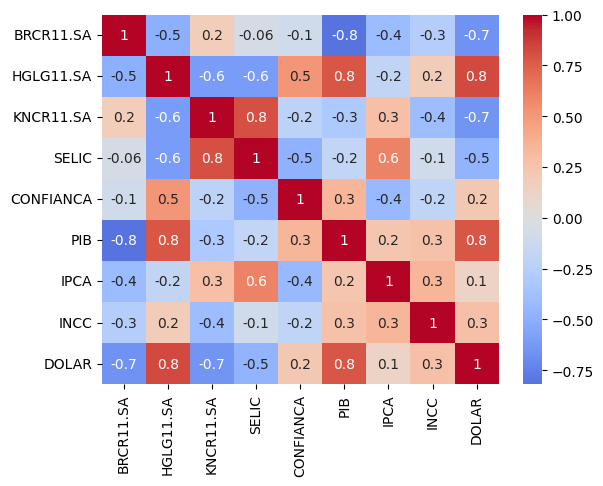

In [203]:
#Colocando no heatmap

lista_macros = tabela_fiis.columns

sns.heatmap(tabela_fiis, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

In [204]:
#Gráfico comparativo

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='BRCR11', x=comparativo_fiis.index, y=comparativo_fiis['BRCR11.SA']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=comparativo_fiis.index, y=comparativo_fiis['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='BRCR11 VS DOLAR', template='simple_white')
fig.show()

In [205]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='HGLG11.SA', x=comparativo_fiis.index, y=comparativo_fiis['HGLG11.SA']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=comparativo_fiis.index, y=comparativo_fiis['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='HGLG11.SA VS DOLAR', template='simple_white')
fig.show()

## Ações

In [206]:
def heatmap(df):
  comparativo_df = pd.merge(df,macros2, how='inner', left_index=True, right_index=True)
  tabela_df=comparativo_df.corr()
  lista_df = tabela_df.columns

  sns.heatmap(tabela_df, cmap='coolwarm',
              center=0,
              annot=True,
              fmt='.1g',
              xticklabels=lista_df,
              yticklabels=lista_df);

[*********************100%***********************]  1 of 1 completed

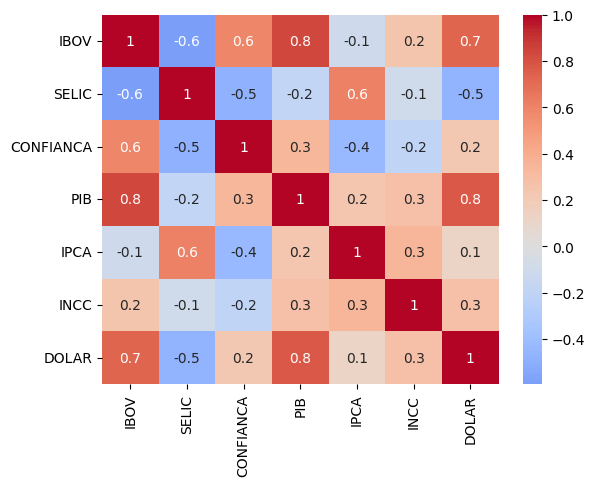

In [208]:
#Indice
ibov = pd.DataFrame()
ibov['IBOV'] = yf.download('^BVSP', start='2015-01-01', end='2022-12-31', auto_adjust=False, multi_level_index=False)['Adj Close']

comparativo_ibov = pd.merge(ibov,macros2, how='inner', left_index=True, right_index=True)
tabela_ibov=comparativo_ibov.corr()
lista_ibov = tabela_ibov.columns

sns.heatmap(tabela_ibov, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_ibov,
            yticklabels=lista_ibov);


In [209]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='IBOV', x=comparativo_ibov.index, y=comparativo_ibov['IBOV']),row=1, col=1)
fig.add_trace(go.Scatter(name='SELIC', x=comparativo_ibov.index, y=comparativo_ibov['SELIC']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='IBOV VS SELIC', template='simple_white')
fig.show()

### Varejo Eletrônico
'MGLU3.SA','VIIA3.SA','AMER3.SA'

[*********************100%***********************]  2 of 3 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VIIA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  2 of 3 completed

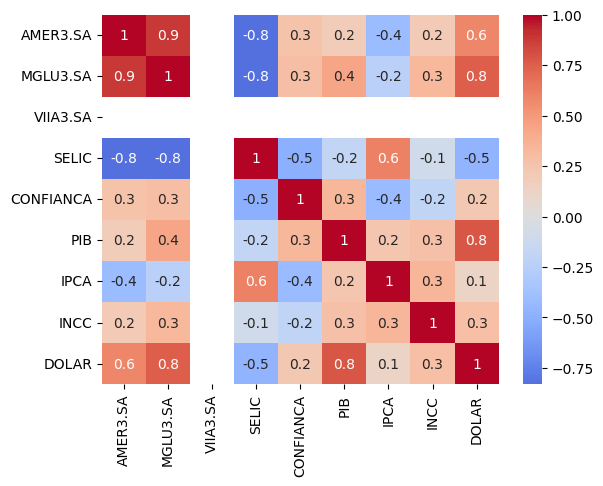

In [210]:
#Varejo eletronicos
lista_varejo = ['MGLU3.SA','VIIA3.SA','AMER3.SA']
varejo_eletronico = yf.download(lista_varejo, start='2015-01-01', end='2022-12-31', auto_adjust=False, multi_level_index=False)['Adj Close']

heatmap(varejo_eletronico)

### Moda/Vestuário
'GUAR3.SA','LREN3.SA','AMAR3.SA','ARZZ3.SA'

[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARZZ3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


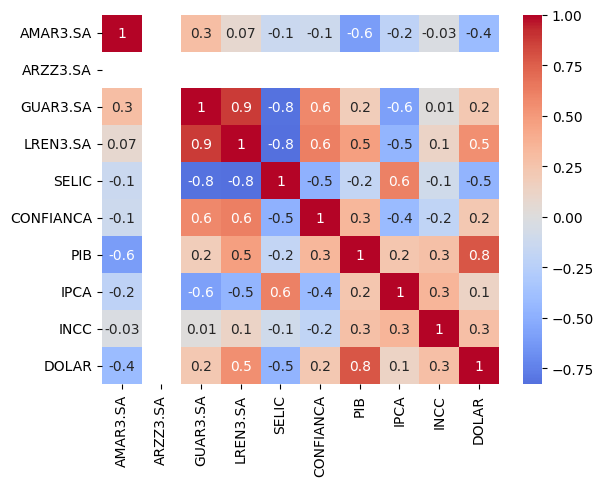

In [211]:
#Moda/Vestuario

moda_vestuario = ['GUAR3.SA','LREN3.SA','AMAR3.SA','ARZZ3.SA']
moda_vestuario = yf.download(moda_vestuario, start='2015-01-01', end='2022-12-31', auto_adjust=False, multi_level_index=False)['Adj Close']
heatmap(moda_vestuario)


### Supermercado Atacarejo
'ASAI3.SA', 'CRFB3.SA', 'GMAT3.SA', 'PCAR3.SA'

[*********************100%***********************]  4 of 4 completed


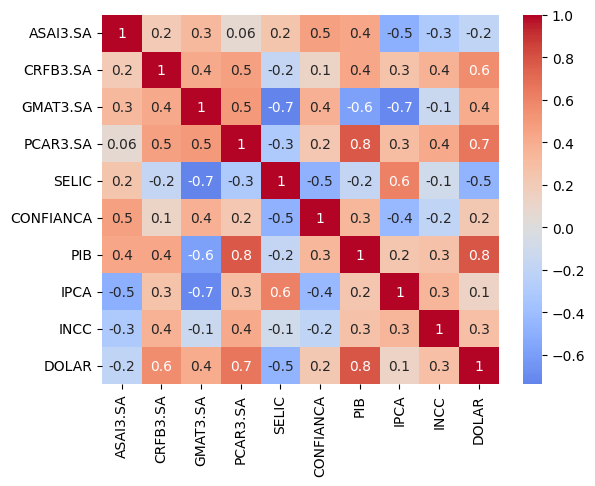

In [212]:
#Supermercados Atacarejo

supermercados = ['ASAI3.SA', 'CRFB3.SA', 'GMAT3.SA', 'PCAR3.SA']

varejo_superm = yf.download(supermercados, start='2015-01-01', end='2023-01-01', auto_adjust=False, multi_level_index=False)['Adj Close']

heatmap(varejo_superm)

### Construtoras
'CYRE3.SA','MRVE3.SA','HBOR3.SA', 'EVEN3.SA'

[*********************100%***********************]  4 of 4 completed


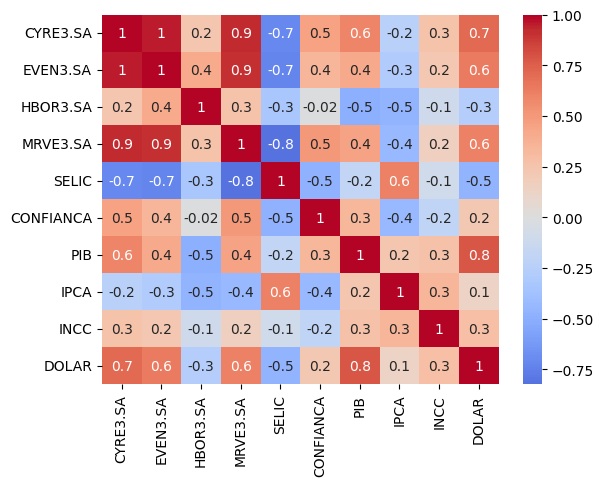

In [213]:
#Construtoras

lista_construcao = ['CYRE3.SA','MRVE3.SA','HBOR3.SA', 'EVEN3.SA']

construcao = yf.download(lista_construcao, start='2015-01-01', end='2022-12-31', auto_adjust=False, multi_level_index=False)['Adj Close']

heatmap(construcao)

### Commodities
'PETR4.SA', 'PRIO3.SA','VALE3.SA','SUZB3.SA'

[*********************100%***********************]  4 of 4 completed


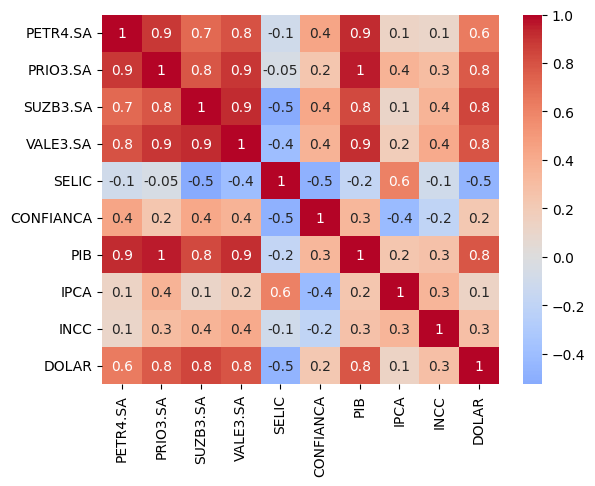

In [214]:
#Commodities

lista_commodities = ['PETR4.SA', 'PRIO3.SA','VALE3.SA','SUZB3.SA']

commodities = yf.download(lista_commodities, start='2015-01-01', end='2022-12-31', auto_adjust=False, multi_level_index=False)['Adj Close']
heatmap(commodities)

### Bancos

'BBAS3.SA','BBDC4.SA', 'ITUB4.SA', 'SANB11.SA'

[*********************100%***********************]  4 of 4 completed


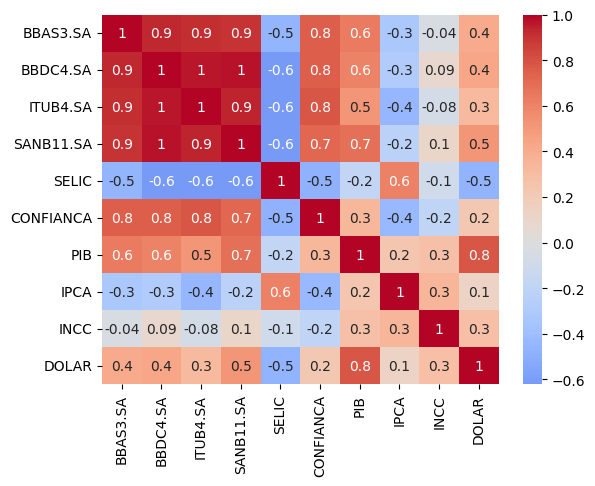

In [215]:
#Bancos

lista_bancos = ['BBAS3.SA','BBDC4.SA', 'ITUB4.SA', 'SANB11.SA']

bancos = yf.download(lista_bancos, start='2015-01-01', end='2022-12-31', auto_adjust=False, multi_level_index=False)['Adj Close']
heatmap(bancos)